# Probabilistic Machine Learning
#### Machine Learning in Science, University of Tübingen, Summer Semester 2022
## Exercise 06

## Julian Zimmerlin 6009977
## Leander Zimmermann 4165446

**hand in before 03.06.2022, 12:00 p.m. (noon)**

---

In the lecture you learned about Gaussian process regression, and how it is basically the infinite-dimension limit of classification using generalized linear models. In this programming exercise, you will explore GP classification, using publicly available implementations as well as implementing your own classifier.


## Outline
1) Play around with a toy dataset and the scikit-learn black box GPs to get an intuition on how different kernels behave and ask high-level questions about Gaussian Processes, Kernels, etc. (easy part).

2) Implement a binary GP classification class yourself and apply it to the toy dataset and FashionMNIST dataset (harder part).

# 1) Binary Gaussian process classification using scikit-learn and a toy dataset
Recommended reference: https://scikit-learn.org/stable/modules/gaussian_process.html

Exercise adapted from https://scikit-learn.org/stable/auto_examples/gaussian_process/plot_gpc.html#sphx-glr-download-auto-examples-gaussian-process-plot-gpc-py 
- License disclaimer
```python
# Authors: Jan Hendrik Metzen <jhm@informatik.uni-bremen.de>
#
# License: BSD 3 clause
```

In [1]:
import numpy as np

from matplotlib import pyplot as plt

from sklearn.metrics import accuracy_score, log_loss
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF, Matern, DotProduct, RationalQuadratic, ExpSineSquared

np.random.seed(42)

## Create a toy dataset $p(y, X)$ 
of $N$ samples
$$X \sim U(0, 5)\\ 
    y(X)=\begin{cases}
      0, & \text{if}\ X\leq2.5 \\
      1, & \text{otherwise}
    \end{cases}$$
and split it into training and test splits. (Note: decide on your own how large $N$ and the split ratio is).

In [2]:
# to create a toy dataset
n = 500
train_size = int(n * .8)

X = np.random.uniform(0,5, size=(n,1))
y = np.zeros(n)
y[X[:,0] > 2.5] = 1
X.shape, y.shape

((500, 1), (500,))

In [3]:
# to create a training and testing split
X_train = X[:train_size]
y_train = y[:train_size]
X_test = X[train_size:]
y_test = y[train_size:]

In [4]:
# to verify the split
print("X_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)
print("X_test shape: ", X_test.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (400, 1)
y_train shape:  (400,)
X_test shape:  (100, 1)
y_test shape:  (100,)


## Specify kernels for the Gaussian process classification
- RBF
- Matern
- RationalQuadratic
- ExpSineSquared
- DotProduct

Tipp: check out the documentation in scikit-learn, e.g. for RBF
https://scikit-learn.org/stable/modules/generated/sklearn.gaussian_process.kernels.RBF.html

In [5]:
# specify the kernels
RBF_kernel = 1.0 * RBF(1.0)
Matern_kernel = 1.0 * Matern(length_scale=1.0, nu=1.5)
RationalQuadratic_kernel = 1 * RationalQuadratic(length_scale=1.0, alpha=1.5)
ExpSineSquared_kernel = 1 * ExpSineSquared(length_scale=1, periodicity=1)
DotProduct_kernel = DotProduct()

## Instantiate Gaussian process classifier (GPC) objects

Choose a kernel and create the Gaussian process classifier instances.
To compare the initial kernel vs. the optimized kernel, create two instances: (1) `gp_fix` with `optimizer=None` and (2) `gp_opt` without specifying `optimizer`, leaving it at its default value (maximum log-marginal likelihood estimation). Call the `.fit(X, y)` method on both to fit the training data. 

In [6]:
# Specify Gaussian Processes with fixed and optimized hyperparameters
gp_fix = GaussianProcessClassifier(optimizer=None, kernel=RBF_kernel)
gp_fix.fit(X_train,y_train)

gp_opt = GaussianProcessClassifier(kernel=RBF_kernel)
gp_opt.fit(X_train,y_train)

D:\Uni Master\Semester 2\Statistical ML\Assignments\sml_env\lib\site-packages\sklearn\gaussian_process\_gpc.py:472: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
D:\Uni Master\Semester 2\Statistical ML\Assignments\sml_env\lib\site-packages\sklearn\gaussian_process\kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


GaussianProcessClassifier(kernel=1**2 * RBF(length_scale=1))

In [7]:
# to verify the kernels differ
gp_fix.kernel_, gp_opt.kernel_

(1**2 * RBF(length_scale=1), 316**2 * RBF(length_scale=1.51))

## Print the log marginal likelihood $\text{log} p(\theta)$ for the kernel parameter to compare the initial and the optimized kernel parameter log probabilities

In [8]:
print("Log Marginal Likelihood (initial): %.3f"
      % gp_fix.log_marginal_likelihood(gp_fix.kernel_.theta))
print("Log Marginal Likelihood (optimized): %.3f"
      % gp_opt.log_marginal_likelihood(gp_opt.kernel_.theta))

Log Marginal Likelihood (initial): -53.115
Log Marginal Likelihood (optimized): -6.603


## Print the accuracy (using `accuracy_score`) between prediction and ground truth class to compare the initialized and the optimized GPC classification performance

In [9]:
print("Accuracy: %.3f (initial) %.3f (optimized)"
      % (accuracy_score(y_test, gp_fix.predict(X_test)),
         accuracy_score(y_test, gp_opt.predict(X_test))))

Accuracy: 0.980 (initial) 1.000 (optimized)


## Print the log loss (using `log_loss`) between prediction and ground truth class to compare how the maximum log-marginal likelihood estimates compare to the arbitrary kernel parameters 

In [10]:
print("Log-loss: %.3f (initial) %.3f (optimized)"
      % (log_loss(y_test, gp_fix.predict_proba(X_test)),
         log_loss(y_test, gp_opt.predict_proba(X_test))))

Log-loss: 0.086 (initial) 0.198 (optimized)


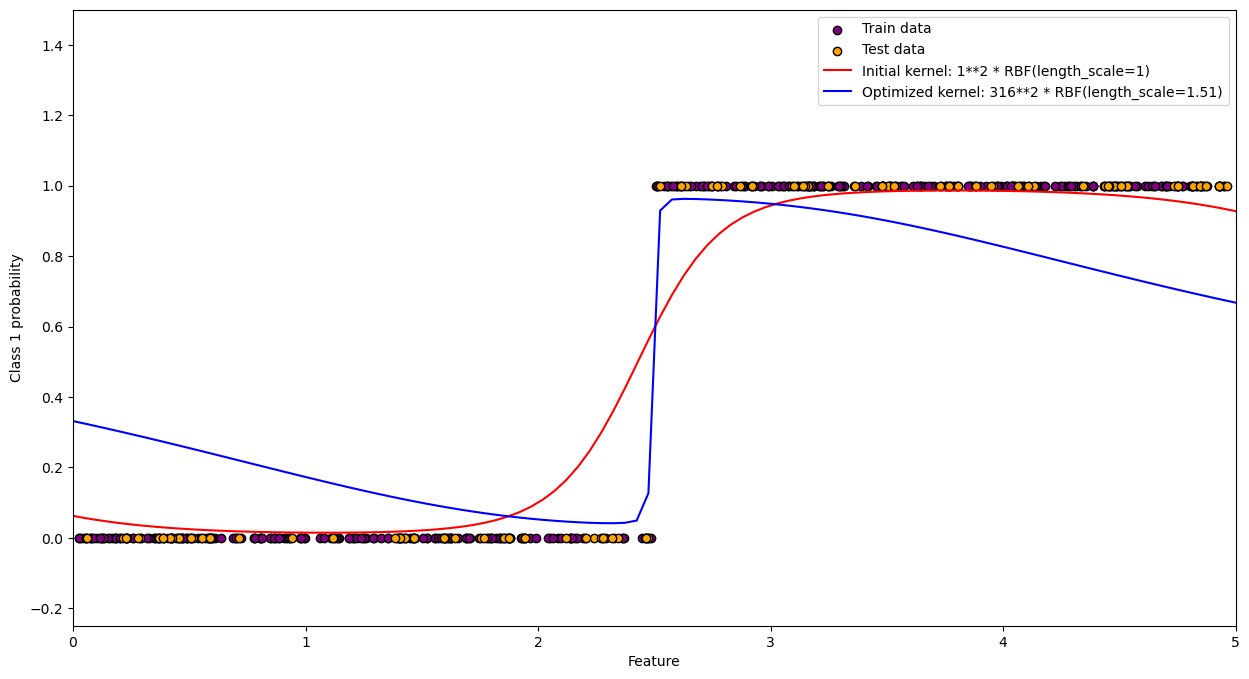

In [11]:
# Plot posteriors
plt.figure(figsize=(15,8))
plt.scatter(X_train[:, 0], y_train, c='purple', label="Train data",
            edgecolors=(0, 0, 0))
plt.scatter(X_test[:, 0], y_test, c='orange', label="Test data",
            edgecolors=(0, 0, 0))
X_ = np.linspace(0, 5, 100)
plt.plot(X_, gp_fix.predict_proba(X_[:, np.newaxis])[:, 1], 'r',
         label="Initial kernel: %s" % gp_fix.kernel_)
plt.plot(X_, gp_opt.predict_proba(X_[:, np.newaxis])[:, 1], 'b',
         label="Optimized kernel: %s" % gp_opt.kernel_)
plt.xlabel("Feature")
plt.ylabel("Class 1 probability")
plt.xlim(0, 5)
plt.ylim(-0.25, 1.5)
plt.legend(loc="best")
plt.show()

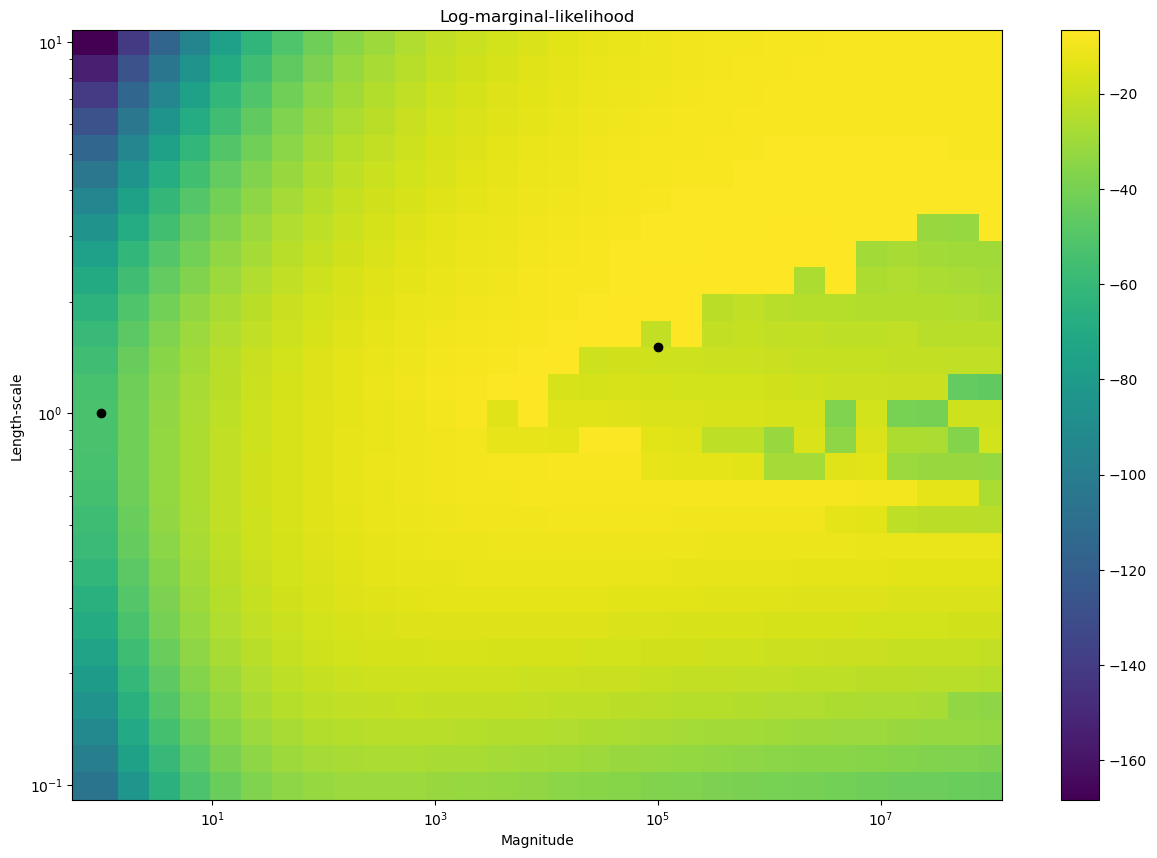

In [12]:
# Plot LML landscape
plt.figure(figsize=(15,10))
theta0 = np.logspace(0, 8, 30)
theta1 = np.logspace(-1, 1, 29)
Theta0, Theta1 = np.meshgrid(theta0, theta1)
LML = [[gp_opt.log_marginal_likelihood(np.log([Theta0[i, j], Theta1[i, j]]))
        for i in range(Theta0.shape[0])] for j in range(Theta0.shape[1])]
LML = np.array(LML).T
plt.plot(np.exp(gp_fix.kernel_.theta)[0], np.exp(gp_fix.kernel_.theta)[1],
         'ko', zorder=10)
plt.plot(np.exp(gp_opt.kernel_.theta)[0], np.exp(gp_opt.kernel_.theta)[1],
         'ko', zorder=10)
plt.pcolor(Theta0, Theta1, LML)
plt.xscale("log")
plt.yscale("log")
plt.colorbar()
plt.xlabel("Magnitude")
plt.ylabel("Length-scale")
plt.title("Log-marginal-likelihood")

plt.show()

## Questions:
1. What do the blue and the red line in the posterior plot represent?
2. What does the log-marginal-likelihood describe and what is it used for?
3. Using an initial RBF kernel `1**2 * RBF(length_scale=1)`, can you use the plot of the class 1 probability to reason about why the log loss with the initial RBF kernel is lower than with the optimized RBF kernel?
4. Check out all 5 different kernels. Which one is the best fit? Is any Kernel strictly better than another?
5. Implement a different function and test it with all 5 Kernels. Is every Kernel able to fit the problem? The function can be simple, e.g. 1 if x < 1 or x > 4, 0 else.

Note: text of single sentences to answer the questions that don't require code at this point are sufficient.

## Answers:
1. Both show the output probability (for class 1) of the corresponding estimator, over the given sample X.  The blue line is using the optimized Kernel, which results in a much sharper deision boundary
2. It is used to judge how well we fit the data with a given kernel and parameters. The higher the marginal likelihood, the better the fit of the data.
3. While in the middle, the optimized kernel outputs probabilities closer ot 0 and 1, towards X=0 and X=5, it is the other way around, s.t. the optimized kernel produces probabilities close to .5 overall, resulting in a higher loss inspite of the perfect acuracy.
4. Most Kernels produce a really good accuracy. In terms of log loss the optimized DotProduct Kernel, followed by the unoptimized MaternKernel perform the best. The unoptimized ExpSineSquared Kernel is not usable for this problem

# 2) Implementing a binary Gaussian process classification object

Instructions:
- complete the methods `fit`, `predict_all` of the class `GPClassifier`. This is supposed to give some structure to the programming to focus on the hard parts. Feel free to implement your own way from scratch. We suggest you document *why* you implement it the way you do.

```python
from scipy.stats import norm
from scipy.integrate import quad
from scipy.special import expit as sigmoid
from scipy.spatial.distance import cdist

# based on the implementation given in the book by Rasmussen and Williams
class GPClassifier:
    
    def __init__(self, X, y, kernel):
        self.X = X
        self.y = y
        self.kernel = kernel
        self.K = self.kernel(self.X, self.X)
        assert len(self.X) == len(self.y)
        self.size = len(self.X)
        
        self.f = None
        self.W = None
        self.L = None 
            
    def fit(self):
        """Single class, mode-finding algorithm for binary GPC.
        
        Returns:
             float: Log-marginal likelihood after convergence, 
                 here |obj - obj_old| < 1e-5.
                 
        Note:
            Requires:
                self.K        
            Updates:
                self.W
                self.L
                self.f
        
        Reference: Algorithm 3.1, Rasmussen and Williams
        """
        ...
                
    
    def predict_all(self, X_pred):
        """Predictions for binary GPC.
        
        Returns:
            array: predictive class probability for class 1.
            array: class labels y_pred.
            
        Note:
            Requires:
                self.X
                self.y
                self.L
                self.W
                self.kernel
                self.f          
        
        Reference: Algorithm 3.2, Rasmussen and Williams
        """
        ...
```

- only consider binary classification
- use the cholesky decomposition to solve the linear system because that is numerically stable
- use the kernel parameters suggested in the toy example instead of implementing an optimizer

- Hints: 
    1. Use the knowledge from the lecture on GPs and Gaussian_Process_Regression_2022.ipynb. You can base your implementation on the classification algorithm (3.1) from Rasmussen and Williams in http://www.gaussianprocess.org/gpml/chapters/RW3.pdf.
    2. Implement the likelihood according to using [0,1] labels.
    3. You can compute a definite integral using `scipy.integrate.quad`.

In [13]:
# implement your GPClassifier here
from scipy.stats import norm
from scipy.integrate import quad
from scipy.special import expit as sigmoid
from scipy.spatial.distance import cdist
from numpy.linalg import cholesky, solve


# based on the implementation given in the book by Rasmussen and Williams
class GPClassifier:
    
    def __init__(self, X, y, kernel):
        self.X = X
        self.y = y
        self.kernel = kernel
        self.K = self.kernel(self.X, self.X)
        assert len(self.X) == len(self.y)
        self.size = len(self.X)
        
        self.f = None
        self.W = None
        self.L = None
                
    def fit(self):
        """Single class, mode-finding algorithm for binary GPC.
        
        Returns:
             float: Log-marginal likelihood after convergence, 
                 here |obj - obj_old| < 1e-5.
                 
        Note:
            Requires:
                self.K        
            Updates:
                self.W
                self.L
                self.f
        
        Reference: Algorithm 3.1, Rasmussen and Williams
        """
        f = np.zeros(self.size)
        log_marginal_likelihood = -np.inf
        while True: 
            # Line 4
            pi = sigmoid(f)
            W = np.zeros_like(self.K)
            
            np.fill_diagonal(W, (pi * (1-pi)))
            W_sqrt = np.sqrt(W)
            
            # Line 5
            B = np.identity(W.shape[0]) + W_sqrt @ self.K @ W_sqrt

            L = np.linalg.cholesky(B)
            
            # Line 6
            b = W @ f + (self.y - pi)

            # Line 7
            a = b - W_sqrt @ solve(L.T, solve(L, W_sqrt @ self.K @ b))
            
            # Line 8
            f = self.K @ a
            
            # Line 10:
            lml = (-0.5 * a.T @ f) - np.log(1 + np.exp(-((self.y*2)-1) * f)).sum() - np.log(L.diagonal()).sum()
            
            # Convergence check using log marginal LL
            if np.abs(lml - log_marginal_likelihood) < 1e-5:
                break
            log_marginal_likelihood = lml
            
        self.f = f
        self.W = W 
        self.L = L
        return log_marginal_likelihood
    
    def predict_all(self, X_pred):
        """Predictions for binary GPC.
        
        Returns:
            array: predictive class probability for class 1.
            array: class labels y_pred.
            
        Note:
            Requires:
                self.X
                self.y
                self.L
                self.W
                self.kernel
                self.f          
        
        Reference: Algorithm 3.2, Rasmussen and Williams
        """
        f_star = self.kernel(self.X, X_pred).T @ (self.y - sigmoid(self.f))
        v = solve(self.L, np.sqrt(self.W) @ self.kernel(self.X, X_pred))
        V_fstar = self.kernel(X_pred,X_pred) - v.T @ v
        
        pi_s = []
        for i in range(len(f_star)):
            mean = f_star[i]
            var = V_fstar.diagonal()[i]
            pi_s.append(quad(lambda z: sigmoid(z)*norm.pdf(z, loc=mean, scale=var), -np.inf, np.inf)[0])
        scores = np.array(pi_s)
        preds = (np.array(pi_s) >= 0.5).astype(int)
    
        return (scores, preds)

## Use your own GPC implementation to classify the toy data from exercise 1)
Instructions:
- implement the rbf kernel (and e.g. linear) to be used with `GPClassifier`.
    E.g.:
    ``` python
    # kernels:
    def rbf(x1,x2, sigma, ell):
        ...
    def linear(x_1, x_2, sigma):
        ...
        
    # set the kernel parameters from the toy example
    rbf_kernel = lambda x1, x2: rbf(x1, x2, 91.7, 1.12)
    linear_kernel = lambda x1, x2: linear(x1, x2, ?)
    ```
- compare your results to the scikit-learn off-the-shelf GP. Hint: they should be similar ;)

In [23]:
# to create a toy dataset
n = 100
train_size = 50
X = np.random.uniform(0, 5, n)
y = (X > 2.5).astype(int)  # using bool to int casting
# to create a training and testing split
X_train = X[0:train_size].reshape(-1,1)
y_train = y[0:train_size]
X_test = X[train_size:n].reshape(-1,1)
y_test = y[train_size:n]
# to verify the split
print("X_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)
print("X_test shape: ", X_test.shape)
print("y_test shape: ", y_test.shape)


X_train shape:  (50, 1)
y_train shape:  (50,)
X_test shape:  (50, 1)
y_test shape:  (50,)


In [24]:
# implement your kernels here and classify the toy data
# kernels:
def rbf(x1,x2, sigma, ell):
    # here we use the identity ||x-y||^2 = ||x||^2 + ||y||^2 - 2 * x^T * y
    x1_norm = np.sum(x1**2, axis=-1)
    x2_norm = np.sum(x2**2, axis=-1)
    K = sigma**2 * np.exp(-1/(2*ell**2) * (x1_norm[:,None] + x2_norm[None,:] - 2 * np.dot(x1, x2.T)))
    return K
                     
def linear(x_1, x_2, sigma):
    return sigma**2 * x_1 @ x_2.T


## RBF

# OUR CODE
rbf_kernel = lambda x1, x2: rbf(x1, x2, 91.7, 1.12)
gpc = GPClassifier(X_train, y_train, rbf_kernel)
gpc.fit()
scores, preds = gpc.predict_all(X_test)
print(scores)

# STANDARD SKLEARN
gp_opt = GaussianProcessClassifier(kernel=RBF_kernel)
gp_opt.fit(X_train,y_train)

print("RBF KERNEL -- Accuracy: %.3f (OURS) %.3f (SKLEARN)"
      % (accuracy_score(y_test, preds),
         accuracy_score(y_test, gp_opt.predict(X_test))))



[0.49873065 0.54665843 0.51844217 0.50419031 0.47719749 0.49830892
 0.49491923 0.48997389 0.50953531 0.52332013 0.49062503 0.50073987
 0.51454136 0.49639817 0.49858825 0.49798822 0.49616548 0.49787789
 0.49746793 0.49486725 0.49768606 0.50145768 0.49879076 0.57085819
 0.48309272 0.50076519 0.49848238 0.48549401 0.50084843 0.50181292
 0.50252702 0.49581722 0.49772495 0.5077418  0.50115197 0.52975084
 0.52301465 0.49506517 0.50352058 0.49745966 0.49298753 0.47924234
 0.65800843 0.49626213 0.49845235 0.51375071 0.49472456 0.51993153
 0.49796746 0.42429269]
RBF KERNEL -- Accuracy: 1.000 (OURS) 1.000 (SKLEARN)


In [25]:
## LINEAR:

# OUR CODE
linear_kernel = lambda x1, x2: linear(x1, x2, 0.006)
gpc = GPClassifier(X_train, y_train, linear_kernel)
gpc.fit()
scores, preds = gpc.predict_all(X_test)

# STANDARD SKLEARN
gp_opt = GaussianProcessClassifier(kernel=DotProduct_kernel)
gp_opt.fit(X_train,y_train)

print("LINEAR KERNEL -- Accuracy: %.3f (OURS) %.3f (SKLEARN)"
      % (accuracy_score(y_test, preds),
         accuracy_score(y_test, gp_opt.predict(X_test))))

LINEAR KERNEL -- Accuracy: 0.940 (OURS) 0.980 (SKLEARN)


We can see that we get similar accuracies to the Sklearn implentation with both RBF (1.0/1.0) and linear kernels (0.94 / 0.98).

## Use your own GPC implementation to separate images of Tshirts from images of Trousers using Fashion MNIST
Instructions:
- we use class 0 for t-shirts/tops and class 1 for trousers as the two classes for the binary classification.
- the nasty data wrangling stuff has already been done for you by Pytorch and us.
- decide on a considerate number of samples to train the GPC.
- how accurate can you separate images of Tshirts from images of Trousers using your own `GPClassifier`?

In [17]:
import torch, torchvision
import torchvision.transforms as transforms
torch.manual_seed(42)

In [18]:
# data wrangling: get the first two classes for FMNIST
FMNIST_transform = transforms.Compose([
    transforms.ToTensor(),
])


FMNIST_train = torchvision.datasets.FashionMNIST(
        '~/data/fmnist',
        train=True,
        download=True,
        transform=FMNIST_transform)


FMNIST_test = torchvision.datasets.FashionMNIST(
        '~/data/fmnist',
        train=False,
        download=True,
        transform=FMNIST_transform)

def get_subset_FMNIST(classes=[0,1], dataset=FMNIST_train):
    
    dataset.targets = dataset.targets.clone().detach()
    idx = torch.zeros(dataset.targets.size()).byte()
    for c in classes:
        idx += (dataset.targets==c).byte()
    dataset.targets= dataset.targets[idx]
    dataset.data = dataset.data[idx.numpy().astype(np.bool)]
    
    #remap all classes to list of ints starting at 1
    map_dict = dict()
    for i, c in enumerate(classes):
        map_dict[c] = i
    
    for i, t in enumerate(dataset.targets):
        dataset.targets[i] = map_dict[t.item()]
    
    return(dataset.data, dataset.targets)

classes = [0,1]
FMNIST_train.data, FMNIST_train.targets = get_subset_FMNIST(classes=classes, dataset=FMNIST_train)
FMNIST_test.data, FMNIST_test.targets = get_subset_FMNIST(classes=classes, dataset=FMNIST_test)
print(len(FMNIST_train.targets))
print(FMNIST_train.targets[:10])
print(len(FMNIST_test.targets))
print(FMNIST_test.targets[:10])

12000
tensor([0, 0, 0, 0, 1, 0, 1, 0, 0, 1])
2000
tensor([1, 1, 1, 1, 0, 1, 0, 0, 1, 1])


<ipython-input-18-051cf280937c>:26: UserWarning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead. (Triggered internally at  C:\Users\builder\tkoch\workspace\pytorch\pytorch_1647970138273\work\aten\src\ATen/native/IndexingUtils.h:30.)
  dataset.targets= dataset.targets[idx]
<ipython-input-18-051cf280937c>:27: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dataset.data = dataset.data[idx.numpy().astype(np.bool)]


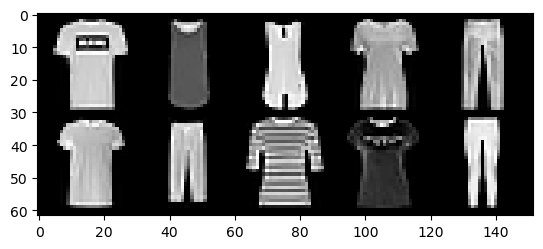

In [19]:
# have a look at the images corresponding to FMNIST_train.targets[:10] 
def imshow(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    #plt.imshow(npimg)
    plt.show()

images = FMNIST_train.data[:10].view(10, 1, 28, 28)
imshow(torchvision.utils.make_grid(images, nrow=5))

In [20]:
# further data wrangling

n_train_samples = 1000

X_train = FMNIST_train.data[:n_train_samples].view(-1, 28*28)
y_train = FMNIST_train.targets[:n_train_samples].view(-1)

X_test = FMNIST_test.data.view(-1, 28*28)
y_test = FMNIST_test.targets.view(-1)

#normalize the data between [-1,1]
X_train = (X_train.float() - 128) / 128
X_test = (X_test.float() - 128) / 128

X_train, X_test = X_train.numpy(), X_test.numpy()
y_train, y_test = y_train.numpy(), y_test.numpy()

In [21]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1000, 784)
(2000, 784)
(1000,)
(2000,)


In [22]:
# classify the data here and report your accuracy

rbf_kernel = lambda x1, x2: rbf(x1, x2, 91.7, 1.12)
gpc = GPClassifier(X_train, y_train, rbf_kernel)
print('Fitting...')
gpc.fit()
print('Fitted. Predicting...')
scores, preds = gpc.predict_all(X_test)
print('Predicted')
print("Accuracy: %.3f (OURS)"
      % (accuracy_score(y_test, preds)))

Fitting...


KeyboardInterrupt: 